# 📊 Análise de Dados - HullZero

Este notebook realiza uma análise completa dos dados disponíveis na pasta `dados/` para entender:
- Estrutura e qualidade dos dados
- Padrões e tendências
- Relacionamentos entre variáveis
- Preparação para uso na aplicação

## 📁 Estrutura de Dados

1. **Dados AIS** (21 arquivos CSV) - Dados de navegação por embarcação
2. **Dados de Consumo** (ResultadoQueryConsumo.csv) - 87.737+ registros
3. **Dados de Eventos** (ResultadoQueryEventos.csv) - 50.904+ registros
4. **Dados de Navios** (Dados navios Hackathon.xlsx) - Informações da frota
5. **Dicionários de Dados** (Dicionários de Dados.xlsx) - Metadados
6. **Relatórios IWS** (Relatorios IWS.xlsx) - Relatórios adicionais



In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime
import json

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar pandas para exibir mais colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Caminho base dos dados
BASE_PATH = Path('dados')
print(f"📁 Pasta de dados: {BASE_PATH.absolute()}")
print(f"✅ Pasta existe: {BASE_PATH.exists()}")



📁 Pasta de dados: /home/douglas/Documentos/hackathon-transpetro/dados
✅ Pasta existe: True


## 1. 📋 Visão Geral dos Arquivos

Primeiro, vamos listar todos os arquivos disponíveis e suas características básicas.



In [2]:
# Listar todos os arquivos na pasta dados
def listar_arquivos():
    """Lista todos os arquivos de dados disponíveis"""
    arquivos = {
        'AIS': [],
        'CSV': [],
        'Excel': [],
        'Outros': []
    }
    
    # Dados AIS
    ais_path = BASE_PATH / "Dados AIS frota TP"
    if ais_path.exists():
        arquivos['AIS'] = sorted(list(ais_path.glob("*.csv")))
    
    # Outros CSVs
    for csv_file in BASE_PATH.glob("*.csv"):
        arquivos['CSV'].append(csv_file)
    
    # Arquivos Excel
    for xlsx_file in BASE_PATH.glob("*.xlsx"):
        arquivos['Excel'].append(xlsx_file)
    
    # Outros
    for other in BASE_PATH.glob("*"):
        if other.is_file() and other.suffix not in ['.csv', '.xlsx', '.pdf']:
            arquivos['Outros'].append(other)
    
    return arquivos

arquivos = listar_arquivos()

print("="*80)
print("📊 ARQUIVOS DISPONÍVEIS")
print("="*80)

print(f"\n📡 Dados AIS ({len(arquivos['AIS'])} arquivos):")
for f in arquivos['AIS']:
    size = f.stat().st_size / 1024  # KB
    print(f"  - {f.name} ({size:.1f} KB)")

print(f"\n📄 Outros CSVs ({len(arquivos['CSV'])} arquivos):")
for f in arquivos['CSV']:
    size = f.stat().st_size / 1024  # KB
    print(f"  - {f.name} ({size:.1f} KB)")

print(f"\n📊 Arquivos Excel ({len(arquivos['Excel'])} arquivos):")
for f in arquivos['Excel']:
    size = f.stat().st_size / 1024  # KB
    print(f"  - {f.name} ({size:.1f} KB)")

print(f"\n📚 Total de arquivos: {len(arquivos['AIS']) + len(arquivos['CSV']) + len(arquivos['Excel'])}")



📊 ARQUIVOS DISPONÍVEIS

📡 Dados AIS (20 arquivos):
  - BRUNO LIMA.csv (1572.2 KB)
  - CARLA SILVA.csv (686.8 KB)
  - DANIEL PEREIRA.csv (893.3 KB)
  - EDUARDO COSTA.csv (1289.0 KB)
  - FABIO SANTOS.csv (2600.5 KB)
  - FELIPE RIBEIRO.csv (656.3 KB)
  - GABRIELA MARTINS.csv (364.3 KB)
  - GISELLE CARVALHO.csv (735.8 KB)
  - HENRIQUE ALVES.csv (908.4 KB)
  - LUCAS MEDONCA.csv (1983.6 KB)
  - MARCOS CAVALCANTI.csv (1125.1 KB)
  - MARIA VALENTINA.csv (2342.9 KB)
  - PAULO MOURA.csv (1095.9 KB)
  - RAFAEL SANTOS.csv (314.4 KB)
  - RAUL MARTINS.csv (789.5 KB)
  - RICARDO BARBOSA.csv (2804.5 KB)
  - RODRIGO PINHEIRO.csv (296.3 KB)
  - ROMARIO SILVA.csv (1482.7 KB)
  - THIAGO FERNANDES.csv (3718.2 KB)
  - VICTOR OLIVEIRA.csv (1696.6 KB)

📄 Outros CSVs (2 arquivos):
  - ResultadoQueryConsumo.csv (2333.8 KB)
  - ResultadoQueryEventos.csv (8155.0 KB)

📊 Arquivos Excel (3 arquivos):
  - Relatorios IWS.xlsx (15.5 KB)
  - Dados navios Hackathon.xlsx (16.0 KB)
  - Dicionários de Dados.xlsx (18.6 KB)



## 2. 📡 Análise dos Dados AIS

Dados de navegação (Automatic Identification System) - um arquivo por embarcação.



In [3]:
# Analisar estrutura dos dados AIS
ais_path = BASE_PATH / "Dados AIS frota TP"

if ais_path.exists():
    # Pegar primeiro arquivo como exemplo
    primeiro_arquivo = sorted(arquivos['AIS'])[0] if arquivos['AIS'] else None
    
    if primeiro_arquivo:
        print(f"📄 Analisando: {primeiro_arquivo.name}")
        print("="*80)
        
        # Ler primeiras linhas
        try:
            df_ais_exemplo = pd.read_csv(primeiro_arquivo, encoding='utf-8', nrows=5)
            print("\n📋 Primeiras 5 linhas:")
            print(df_ais_exemplo)
            
            # Ler arquivo completo para análise
            df_ais_completo = pd.read_csv(primeiro_arquivo, encoding='utf-8')
            print(f"\n📊 Estrutura do arquivo:")
            print(f"  - Total de linhas: {len(df_ais_completo):,}")
            print(f"  - Total de colunas: {len(df_ais_completo.columns)}")
            print(f"\n📋 Colunas disponíveis:")
            for i, col in enumerate(df_ais_completo.columns, 1):
                print(f"  {i}. {col}")
            
            print(f"\n📈 Tipos de dados:")
            print(df_ais_completo.dtypes)
            
            print(f"\n📊 Estatísticas descritivas:")
            print(df_ais_completo.describe())
            
            print(f"\n🔍 Valores nulos:")
            nulls = df_ais_completo.isnull().sum()
            if nulls.sum() > 0:
                print(nulls[nulls > 0])
            else:
                print("  ✅ Nenhum valor nulo encontrado")
                
        except Exception as e:
            print(f"❌ Erro ao ler arquivo: {e}")
            # Tentar com diferentes encodings
            for encoding in ['latin-1', 'iso-8859-1', 'cp1252']:
                try:
                    df_ais_exemplo = pd.read_csv(primeiro_arquivo, encoding=encoding, nrows=5)
                    print(f"\n✅ Sucesso com encoding: {encoding}")
                    print(df_ais_exemplo.head())
                    break
                except:
                    continue
else:
    print("⚠️  Pasta de dados AIS não encontrada")



📄 Analisando: BRUNO LIMA.csv

📋 Primeiras 5 linhas:
         NOME             DATAHORA  RUMO  VELOCIDADE   LATITUDE  LONGITUDE
0  BRUNO LIMA  2023-11-25 05:58:41  58.1        12.2 -24.954948 -46.857981
1  BRUNO LIMA  2023-11-25 06:04:02  58.5        12.2 -24.946165 -46.840565
2  BRUNO LIMA  2023-11-25 06:26:12  59.2        12.1 -24.910048 -46.768348
3  BRUNO LIMA  2023-11-25 06:57:31  69.1        12.3 -24.860081 -46.665115
4  BRUNO LIMA  2023-11-25 07:46:41  62.9        12.2 -24.777231 -46.506615

📊 Estrutura do arquivo:
  - Total de linhas: 25,338
  - Total de colunas: 6

📋 Colunas disponíveis:
  1. NOME
  2. DATAHORA
  3. RUMO
  4. VELOCIDADE
  5. LATITUDE
  6. LONGITUDE

📈 Tipos de dados:
NOME           object
DATAHORA       object
RUMO          float64
VELOCIDADE    float64
LATITUDE      float64
LONGITUDE     float64
dtype: object

📊 Estatísticas descritivas:
               RUMO    VELOCIDADE      LATITUDE     LONGITUDE
count  25338.000000  25338.000000  25338.000000  25338.000000


In [4]:
# Analisar todos os arquivos AIS
if ais_path.exists() and arquivos['AIS']:
    print("="*80)
    print("📊 RESUMO DE TODOS OS ARQUIVOS AIS")
    print("="*80)
    
    resumo_ais = []
    
    for arquivo in sorted(arquivos['AIS']):
        try:
            # Tentar diferentes encodings
            df = None
            for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
                try:
                    df = pd.read_csv(arquivo, encoding=encoding)
                    break
                except:
                    continue
            
            if df is not None:
                resumo_ais.append({
                    'Navio': arquivo.stem,
                    'Registros': len(df),
                    'Colunas': len(df.columns),
                    'Tamanho (KB)': arquivo.stat().st_size / 1024,
                    'Colunas': ', '.join(df.columns.tolist()[:5])  # Primeiras 5 colunas
                })
        except Exception as e:
            print(f"⚠️  Erro ao processar {arquivo.name}: {e}")
    
    if resumo_ais:
        df_resumo = pd.DataFrame(resumo_ais)
        print("\n📋 Resumo por navio:")
        print(df_resumo.to_string(index=False))
        
        print(f"\n📈 Estatísticas gerais:")
        print(f"  - Total de navios: {len(resumo_ais)}")
        print(f"  - Total de registros: {df_resumo['Registros'].sum():,}")
        print(f"  - Média de registros por navio: {df_resumo['Registros'].mean():.0f}")
        print(f"  - Desvio padrão: {df_resumo['Registros'].std():.0f}")



📊 RESUMO DE TODOS OS ARQUIVOS AIS

📋 Resumo por navio:
            Navio  Registros                                    Colunas  Tamanho (KB)
       BRUNO LIMA      25338 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE   1572.238281
      CARLA SILVA      10865 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    686.820312
   DANIEL PEREIRA      13529 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    893.324219
    EDUARDO COSTA      19826 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE   1288.977539
     FABIO SANTOS      40609 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE   2600.500977
   FELIPE RIBEIRO       9933 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    656.343750
 GABRIELA MARTINS       5350 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    364.314453
 GISELLE CARVALHO      10776 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    735.780273
   HENRIQUE ALVES      13703 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE    908.375000
    LUCAS MEDONCA      30358 NOME, DATAHORA, RUMO, VELOCIDADE, LATITUDE   1983.561523

## 3. ⛽ Análise dos Dados de Consumo

Arquivo: `ResultadoQueryConsumo.csv` - Dados de consumo de combustível.



In [5]:
# Analisar dados de consumo
consumo_file = BASE_PATH / "ResultadoQueryConsumo.csv"

if consumo_file.exists():
    print("="*80)
    print("⛽ ANÁLISE DE DADOS DE CONSUMO")
    print("="*80)
    
    try:
        # Ler primeiras linhas para entender estrutura
        df_consumo_sample = pd.read_csv(consumo_file, encoding='utf-8', nrows=10)
        print("\n📋 Primeiras 10 linhas:")
        print(df_consumo_sample)
        
        # Ler arquivo completo
        print("\n⏳ Carregando arquivo completo...")
        df_consumo = pd.read_csv(consumo_file, encoding='utf-8')
        
        print(f"\n📊 Estrutura:")
        print(f"  - Total de registros: {len(df_consumo):,}")
        print(f"  - Total de colunas: {len(df_consumo.columns)}")
        
        print(f"\n📋 Colunas:")
        for i, col in enumerate(df_consumo.columns, 1):
            print(f"  {i}. {col}")
        
        print(f"\n📈 Tipos de dados:")
        print(df_consumo.dtypes)
        
        print(f"\n📊 Estatísticas descritivas:")
        print(df_consumo.describe())
        
        print(f"\n🔍 Valores nulos:")
        nulls = df_consumo.isnull().sum()
        if nulls.sum() > 0:
            print(nulls[nulls > 0])
        else:
            print("  ✅ Nenhum valor nulo")
        
        print(f"\n📊 Valores únicos por coluna:")
        for col in df_consumo.columns:
            unique_count = df_consumo[col].nunique()
            print(f"  - {col}: {unique_count:,} valores únicos")
        
    except Exception as e:
        print(f"❌ Erro: {e}")
        # Tentar outros encodings
        for encoding in ['latin-1', 'iso-8859-1', 'cp1252']:
            try:
                df_consumo = pd.read_csv(consumo_file, encoding=encoding, nrows=10)
                print(f"\n✅ Sucesso com encoding: {encoding}")
                print(df_consumo.head())
                break
            except:
                continue
else:
    print("⚠️  Arquivo de consumo não encontrado")



⛽ ANÁLISE DE DADOS DE CONSUMO

📋 Primeiras 10 linhas:
    SESSION_ID  CONSUMED_QUANTITY DESCRIPTION
0  39800000086               47.0   LSHFO 0.5
1  39800000088               48.0   LSHFO 0.5
2  39800000091               46.0   LSHFO 0.5
3  39800000093               47.0   LSHFO 0.5
4  39800000095               46.0   LSHFO 0.5
5  39800000097               48.0   LSHFO 0.5
6  39800000100               45.0   LSHFO 0.5
7  39800000102               41.0   LSHFO 0.5
8  39800000104               40.0   LSHFO 0.5
9  39800000106               40.0   LSHFO 0.5

⏳ Carregando arquivo completo...

📊 Estrutura:
  - Total de registros: 87,737
  - Total de colunas: 3

📋 Colunas:
  1. SESSION_ID
  2. CONSUMED_QUANTITY
  3. DESCRIPTION

📈 Tipos de dados:
SESSION_ID             int64
CONSUMED_QUANTITY    float64
DESCRIPTION           object
dtype: object

📊 Estatísticas descritivas:
         SESSION_ID  CONSUMED_QUANTITY
count  8.773700e+04       38331.000000
mean   4.347345e+10          14.530740
std

In [6]:
# Analisar dados de eventos
eventos_file = BASE_PATH / "ResultadoQueryEventos.csv"

if eventos_file.exists():
    print("="*80)
    print("📅 ANÁLISE DE DADOS DE EVENTOS")
    print("="*80)
    
    try:
        # Ler primeiras linhas
        df_eventos_sample = pd.read_csv(eventos_file, encoding='utf-8', nrows=10)
        print("\n📋 Primeiras 10 linhas:")
        print(df_eventos_sample)
        
        # Ler arquivo completo
        print("\n⏳ Carregando arquivo completo...")
        df_eventos = pd.read_csv(eventos_file, encoding='utf-8')
        
        print(f"\n📊 Estrutura:")
        print(f"  - Total de registros: {len(df_eventos):,}")
        print(f"  - Total de colunas: {len(df_eventos.columns)}")
        
        print(f"\n📋 Colunas ({len(df_eventos.columns)}):")
        for i, col in enumerate(df_eventos.columns, 1):
            print(f"  {i:2d}. {col}")
        
        print(f"\n📈 Tipos de dados:")
        print(df_eventos.dtypes.value_counts())
        
        print(f"\n📊 Estatísticas descritivas (colunas numéricas):")
        numeric_cols = df_eventos.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(df_eventos[numeric_cols].describe())
        
        print(f"\n🔍 Valores nulos:")
        nulls = df_eventos.isnull().sum()
        if nulls.sum() > 0:
            print(nulls[nulls > 0].sort_values(ascending=False))
        else:
            print("  ✅ Nenhum valor nulo")
        
        # Análise de eventos únicos
        if 'eventName' in df_eventos.columns:
            print(f"\n📊 Tipos de eventos:")
            print(df_eventos['eventName'].value_counts())
        
        if 'shipName' in df_eventos.columns:
            print(f"\n🚢 Navios únicos: {df_eventos['shipName'].nunique()}")
            print(f"  Top 10 navios por número de eventos:")
            print(df_eventos['shipName'].value_counts().head(10))
        
    except Exception as e:
        print(f"❌ Erro: {e}")
        import traceback
        traceback.print_exc()
        # Tentar outros encodings
        for encoding in ['latin-1', 'iso-8859-1', 'cp1252']:
            try:
                df_eventos = pd.read_csv(eventos_file, encoding=encoding, nrows=10)
                print(f"\n✅ Sucesso com encoding: {encoding}")
                print(df_eventos.head())
                break
            except:
                continue
else:
    print("⚠️  Arquivo de eventos não encontrado")



📅 ANÁLISE DE DADOS DE EVENTOS

📋 Primeiras 10 linhas:
     sessionId        shipName    class  eventName         startGMTDate  \
0  39800000084  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-24 11:00:00   
1  39800000086  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-25 11:00:00   
2  39800000088  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-26 11:00:00   
3  39800000091  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-27 12:00:00   
4  39800000093  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-28 10:00:00   
5  39800000095  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-29 11:00:00   
6  39800000097  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-30 09:00:00   
7  39800000100  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-05-31 10:00:00   
8  39800000102  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-06-01 10:00:00   
9  39800000104  DANIEL PEREIRA  Aframax  NAVEGACAO  2021-06-02 10:00:00   

            endGMTDate  duration  distance  aftDraft  fwdDraft  midDraft  \
0  2021-05-25 11:00:00      24.0     282.0  

## 5. 🚢 Análise dos Dados de Navios

Arquivo: `Dados navios Hackathon.xlsx` - Informações detalhadas da frota.



In [7]:
# Analisar dados de navios (Excel)
navios_file = BASE_PATH / "Dados navios Hackathon.xlsx"

if navios_file.exists():
    print("="*80)
    print("🚢 ANÁLISE DE DADOS DE NAVIOS")
    print("="*80)
    
    try:
        # Listar todas as abas
        xl_file = pd.ExcelFile(navios_file)
        print(f"\n📋 Abas disponíveis ({len(xl_file.sheet_names)}):")
        for i, sheet in enumerate(xl_file.sheet_names, 1):
            print(f"  {i}. {sheet}")
        
        # Analisar cada aba
        for sheet_name in xl_file.sheet_names:
            print(f"\n{'='*80}")
            print(f"📊 Aba: {sheet_name}")
            print(f"{'='*80}")
            
            df_navios = pd.read_excel(navios_file, sheet_name=sheet_name)
            
            print(f"\n📋 Estrutura:")
            print(f"  - Linhas: {len(df_navios):,}")
            print(f"  - Colunas: {len(df_navios.columns)}")
            
            print(f"\n📋 Colunas:")
            for i, col in enumerate(df_navios.columns, 1):
                print(f"  {i:2d}. {col}")
            
            print(f"\n📋 Primeiras linhas:")
            print(df_navios.head())
            
            print(f"\n📊 Estatísticas descritivas:")
            numeric_cols = df_navios.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                print(df_navios[numeric_cols].describe())
            
            print(f"\n🔍 Valores nulos:")
            nulls = df_navios.isnull().sum()
            if nulls.sum() > 0:
                print(nulls[nulls > 0])
            else:
                print("  ✅ Nenhum valor nulo")
                
    except Exception as e:
        print(f"❌ Erro: {e}")
        import traceback
        traceback.print_exc()
else:
    print("⚠️  Arquivo de navios não encontrado")



🚢 ANÁLISE DE DADOS DE NAVIOS

📋 Abas disponíveis (3):
  1. Dados navios
  2. Lista de docagens
  3. Especificacao revestimento

📊 Aba: Dados navios

📋 Estrutura:
  - Linhas: 21
  - Colunas: 8

📋 Colunas:
   1. Nome do navio
   2. Classe
   3. Tipo
   4. Porte Bruto
   5. Comprimento total (m)
   6. Boca (m)
   7. Calado (m)
   8. Pontal (m)

📋 Primeiras linhas:
      Nome do navio   Classe        Tipo  Porte Bruto  Comprimento total (m)  \
0     RAFAEL SANTOS  Suezmax  Petroleiro       156628                  274.2   
1    HENRIQUE ALVES  Suezmax  Petroleiro       157700                  274.2   
2   VICTOR OLIVEIRA  Suezmax  Petroleiro       156492                  274.2   
3    FELIPE RIBEIRO  Suezmax  Petroleiro       157700                  274.2   
4  GISELLE CARVALHO  Suezmax  Petroleiro       156504                  274.2   

   Boca (m)  Calado (m)  Pontal (m)  
0      48.0        17.0        23.2  
1      48.0        17.0        23.2  
2      48.0        17.0        23.2  
3  

## 6. 📊 Visualizações e Análises Exploratórias

Vamos criar visualizações para entender melhor os padrões nos dados.



📊 VISUALIZAÇÕES - DADOS AIS


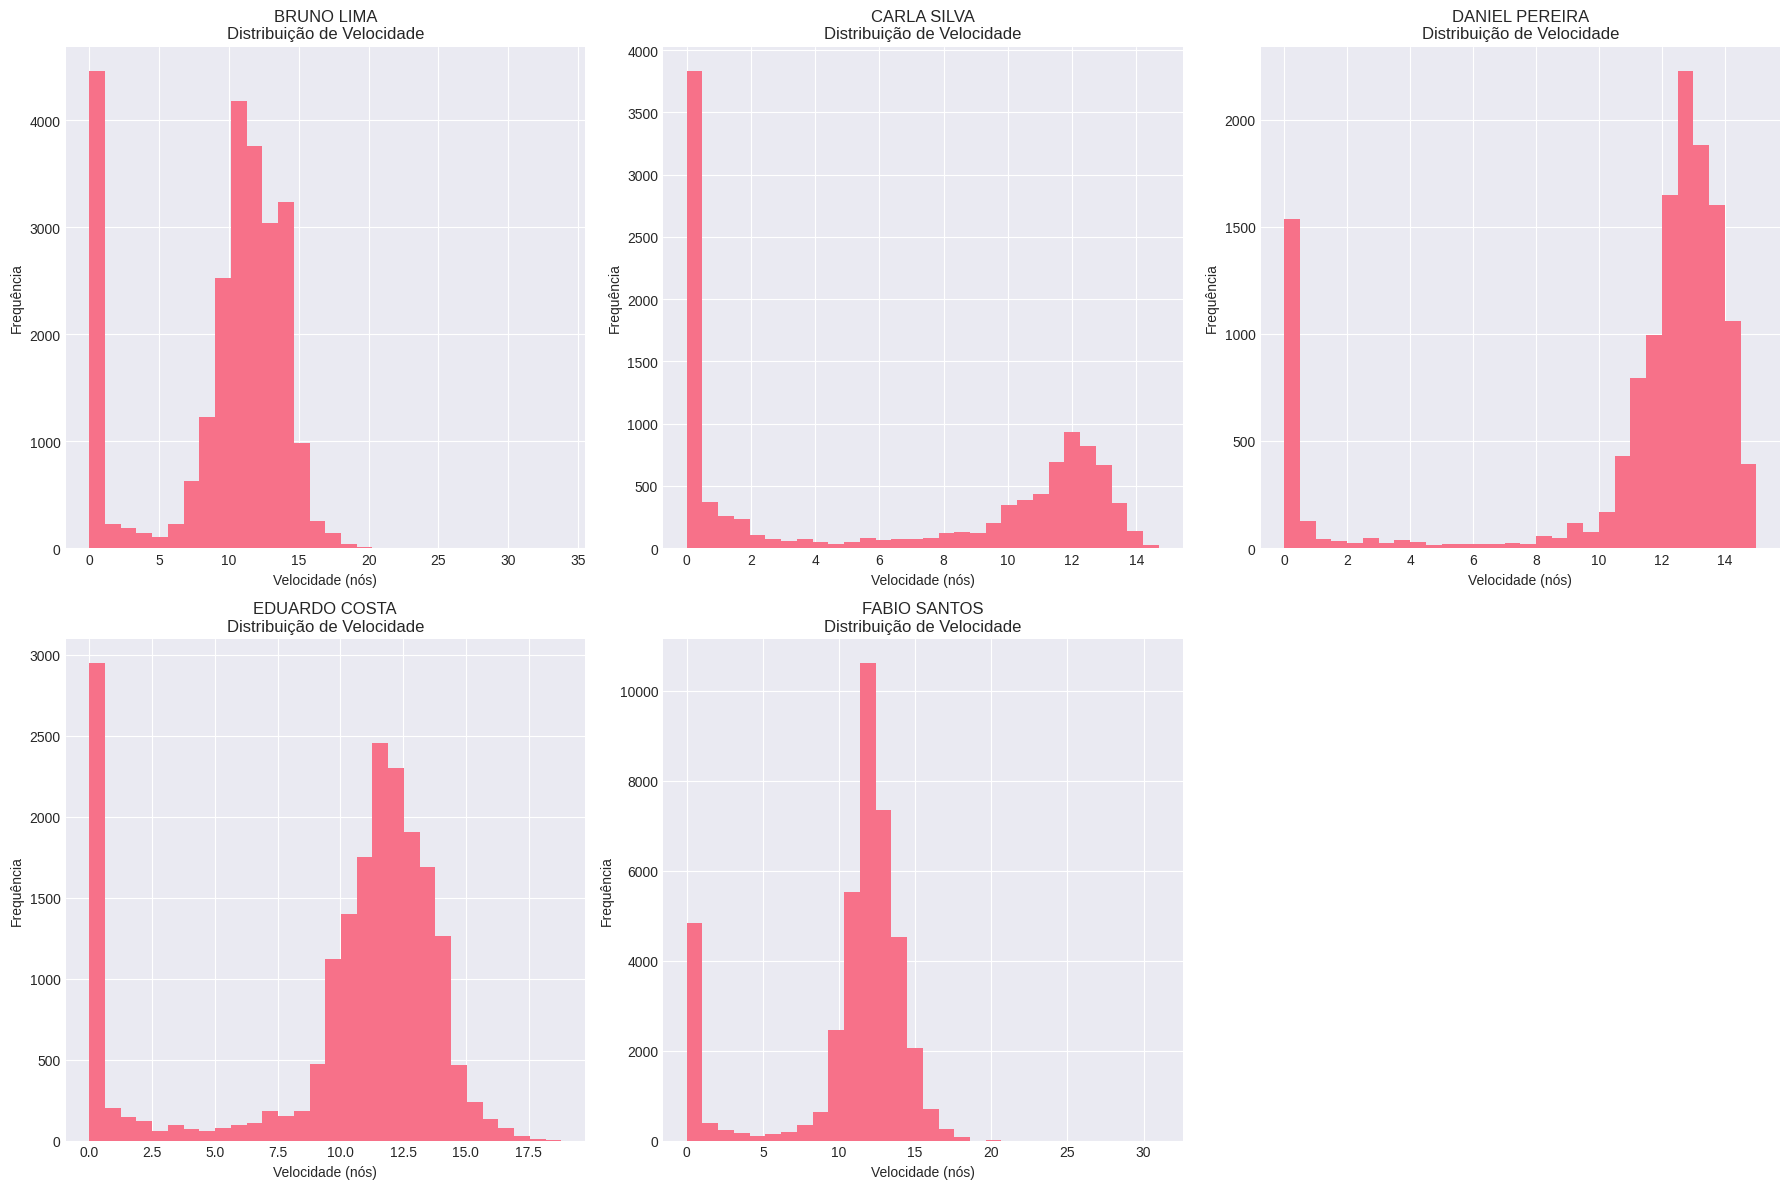

In [8]:
# Visualizações dos dados AIS
if ais_path.exists() and arquivos['AIS']:
    print("="*80)
    print("📊 VISUALIZAÇÕES - DADOS AIS")
    print("="*80)
    
    # Carregar dados de alguns navios
    navios_para_analisar = sorted(arquivos['AIS'])[:5]  # Primeiros 5
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, arquivo in enumerate(navios_para_analisar):
        if idx >= 6:
            break
            
        try:
            # Tentar diferentes encodings
            df = None
            for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
                try:
                    df = pd.read_csv(arquivo, encoding=encoding)
                    break
                except:
                    continue
            
            if df is not None and len(df) > 0:
                ax = axes[idx]
                
                # Verificar colunas disponíveis
                if 'VELOCIDADE' in df.columns or 'speed' in df.columns.lower():
                    vel_col = 'VELOCIDADE' if 'VELOCIDADE' in df.columns else [c for c in df.columns if 'speed' in c.lower()][0]
                    df[vel_col] = pd.to_numeric(df[vel_col], errors='coerce')
                    df[vel_col].plot(kind='hist', bins=30, ax=ax, title=f'{arquivo.stem}\nDistribuição de Velocidade')
                    ax.set_xlabel('Velocidade (nós)')
                    ax.set_ylabel('Frequência')
                elif 'LATITUDE' in df.columns:
                    lat_col = 'LATITUDE'
                    lon_col = 'LONGITUDE' if 'LONGITUDE' in df.columns else None
                    if lon_col:
                        df[lat_col] = pd.to_numeric(df[lat_col], errors='coerce')
                        df[lon_col] = pd.to_numeric(df[lon_col], errors='coerce')
                        ax.scatter(df[lon_col], df[lat_col], alpha=0.5, s=1)
                        ax.set_title(f'{arquivo.stem}\nTrajetória')
                        ax.set_xlabel('Longitude')
                        ax.set_ylabel('Latitude')
                else:
                    ax.text(0.5, 0.5, f'{arquivo.stem}\n\nDados disponíveis:\n{", ".join(df.columns[:5])}', 
                           ha='center', va='center', transform=ax.transAxes)
                    ax.set_xticks([])
                    ax.set_yticks([])
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'Erro:\n{str(e)[:50]}', ha='center', va='center', transform=axes[idx].transAxes)
    
    # Remover eixos vazios
    for idx in range(len(navios_para_analisar), 6):
        axes[idx].remove()
    
    plt.tight_layout()
    plt.show()



📊 VISUALIZAÇÕES - DADOS DE CONSUMO


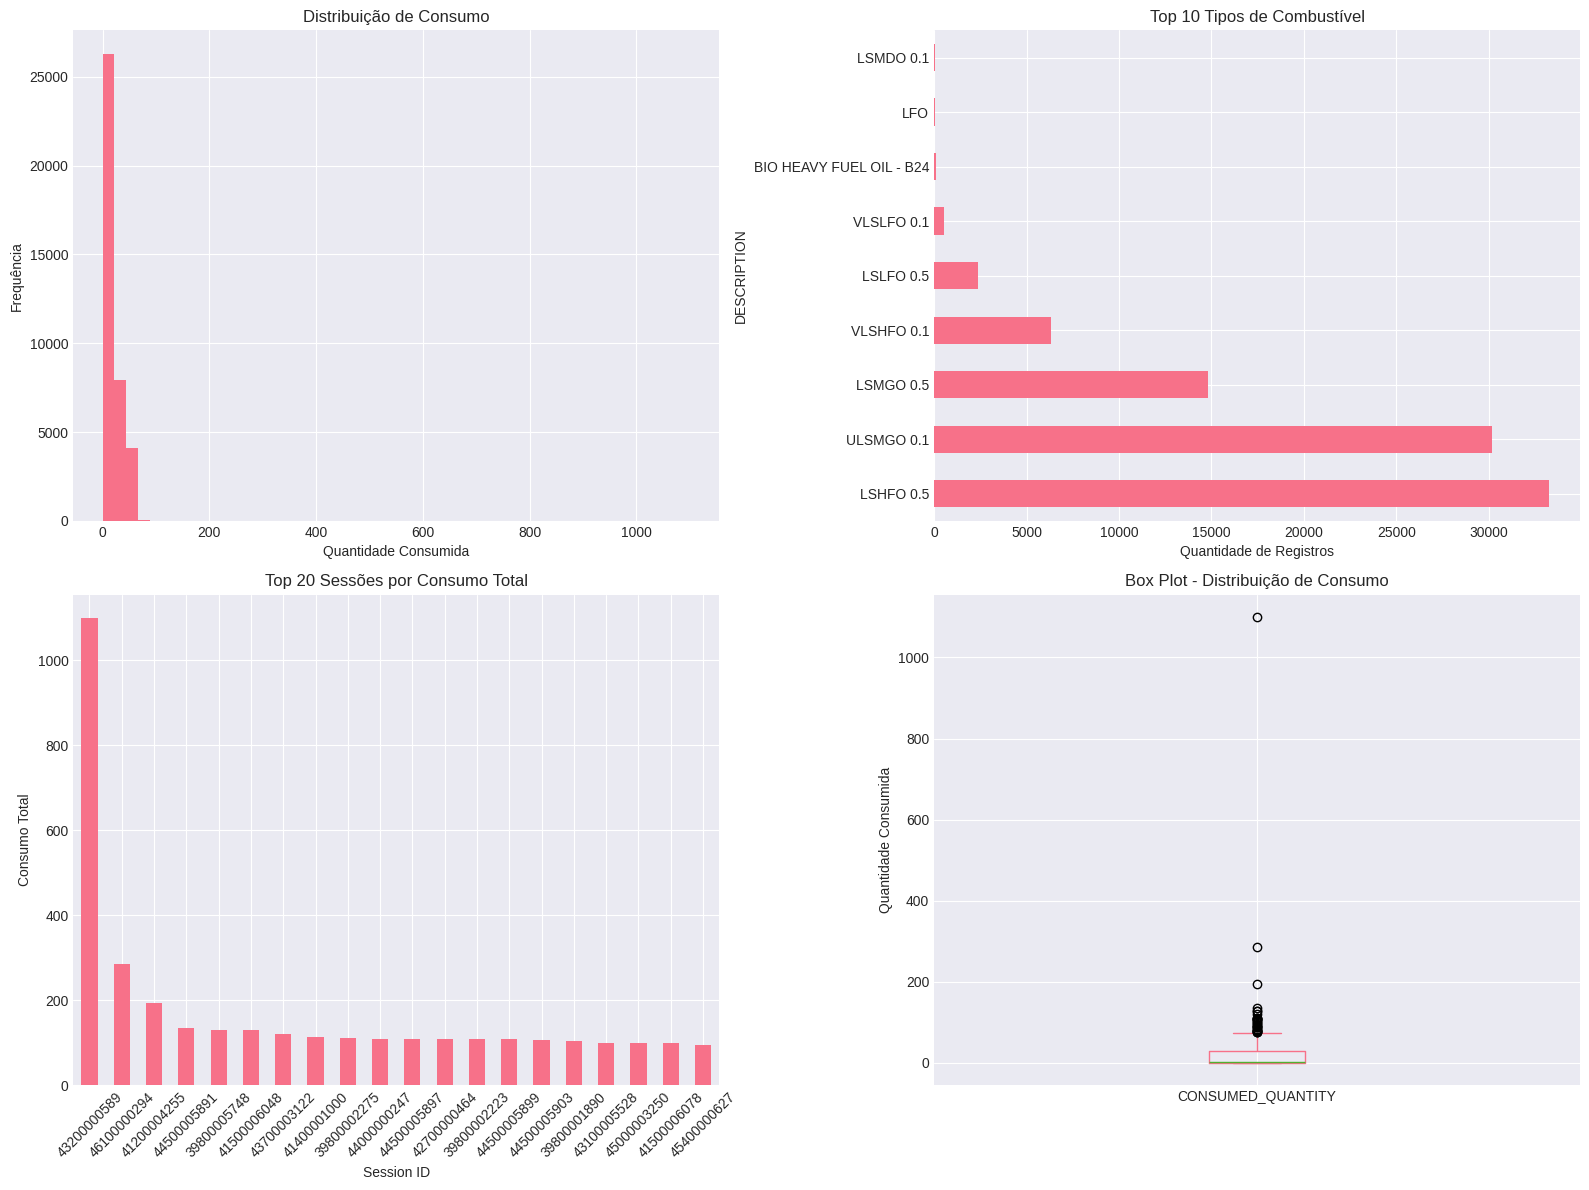

In [9]:
# Visualizações dos dados de consumo
if consumo_file.exists():
    try:
        df_consumo = pd.read_csv(consumo_file, encoding='utf-8')
        
        print("="*80)
        print("📊 VISUALIZAÇÕES - DADOS DE CONSUMO")
        print("="*80)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribuição de consumo
        if 'CONSUMED_QUANTITY' in df_consumo.columns:
            ax1 = axes[0, 0]
            consumo_col = 'CONSUMED_QUANTITY'
            df_consumo[consumo_col] = pd.to_numeric(df_consumo[consumo_col], errors='coerce')
            df_consumo[consumo_col].dropna().hist(bins=50, ax=ax1)
            ax1.set_title('Distribuição de Consumo')
            ax1.set_xlabel('Quantidade Consumida')
            ax1.set_ylabel('Frequência')
        
        # 2. Top tipos de combustível
        if 'DESCRIPTION' in df_consumo.columns:
            ax2 = axes[0, 1]
            top_combustiveis = df_consumo['DESCRIPTION'].value_counts().head(10)
            top_combustiveis.plot(kind='barh', ax=ax2)
            ax2.set_title('Top 10 Tipos de Combustível')
            ax2.set_xlabel('Quantidade de Registros')
        
        # 3. Consumo por sessão (se houver SESSION_ID)
        if 'SESSION_ID' in df_consumo.columns:
            ax3 = axes[1, 0]
            consumo_por_sessao = df_consumo.groupby('SESSION_ID')[consumo_col].sum().sort_values(ascending=False).head(20)
            consumo_por_sessao.plot(kind='bar', ax=ax3)
            ax3.set_title('Top 20 Sessões por Consumo Total')
            ax3.set_xlabel('Session ID')
            ax3.set_ylabel('Consumo Total')
            ax3.tick_params(axis='x', rotation=45)
        
        # 4. Box plot de consumo
        if 'CONSUMED_QUANTITY' in df_consumo.columns:
            ax4 = axes[1, 1]
            df_consumo[consumo_col].dropna().plot(kind='box', ax=ax4)
            ax4.set_title('Box Plot - Distribuição de Consumo')
            ax4.set_ylabel('Quantidade Consumida')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erro ao visualizar consumo: {e}")



📊 VISUALIZAÇÕES - DADOS DE EVENTOS


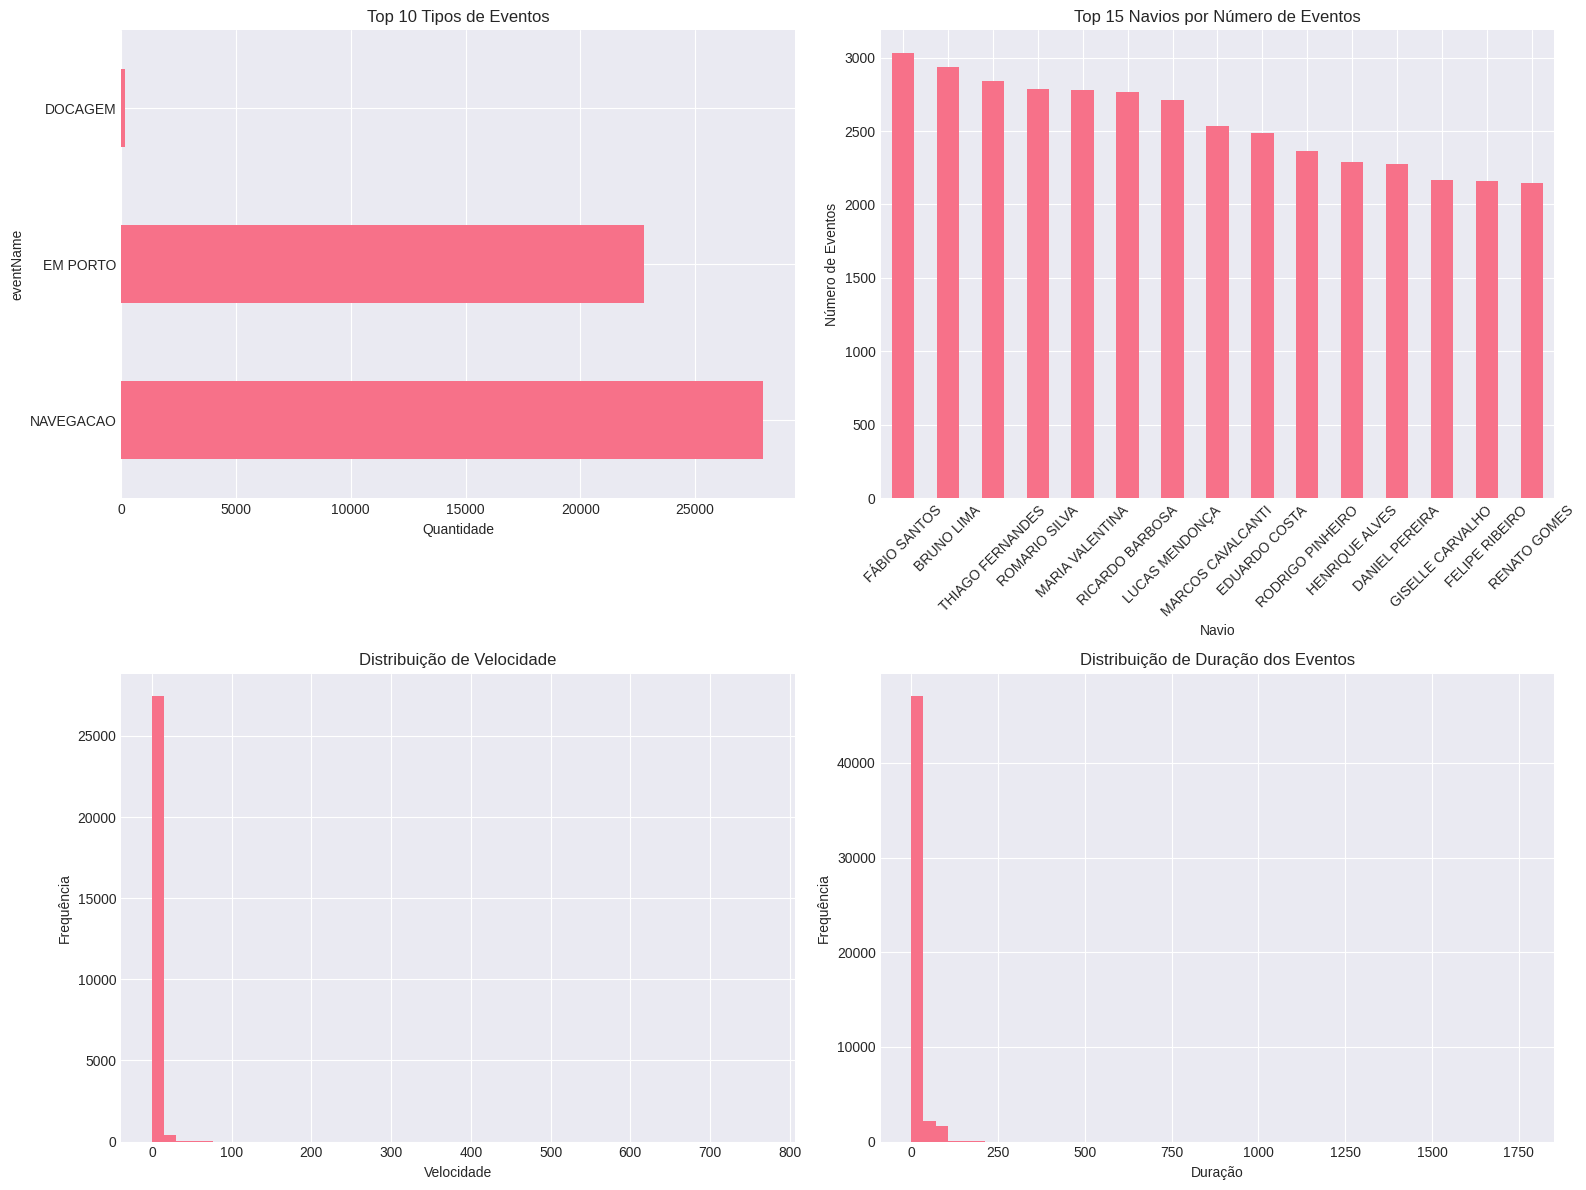

In [10]:
# Visualizações dos dados de eventos
if eventos_file.exists():
    try:
        df_eventos = pd.read_csv(eventos_file, encoding='utf-8')
        
        print("="*80)
        print("📊 VISUALIZAÇÕES - DADOS DE EVENTOS")
        print("="*80)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Tipos de eventos
        if 'eventName' in df_eventos.columns:
            ax1 = axes[0, 0]
            eventos_count = df_eventos['eventName'].value_counts().head(10)
            eventos_count.plot(kind='barh', ax=ax1)
            ax1.set_title('Top 10 Tipos de Eventos')
            ax1.set_xlabel('Quantidade')
        
        # 2. Eventos por navio
        if 'shipName' in df_eventos.columns:
            ax2 = axes[0, 1]
            eventos_por_navio = df_eventos['shipName'].value_counts().head(15)
            eventos_por_navio.plot(kind='bar', ax=ax2)
            ax2.set_title('Top 15 Navios por Número de Eventos')
            ax2.set_xlabel('Navio')
            ax2.set_ylabel('Número de Eventos')
            ax2.tick_params(axis='x', rotation=45)
        
        # 3. Distribuição de velocidade (se disponível)
        if 'speed' in df_eventos.columns:
            ax3 = axes[1, 0]
            df_eventos['speed'] = pd.to_numeric(df_eventos['speed'], errors='coerce')
            df_eventos['speed'].dropna().hist(bins=50, ax=ax3)
            ax3.set_title('Distribuição de Velocidade')
            ax3.set_xlabel('Velocidade')
            ax3.set_ylabel('Frequência')
        
        # 4. Distribuição de duração (se disponível)
        if 'duration' in df_eventos.columns:
            ax4 = axes[1, 1]
            df_eventos['duration'] = pd.to_numeric(df_eventos['duration'], errors='coerce')
            df_eventos['duration'].dropna().hist(bins=50, ax=ax4)
            ax4.set_title('Distribuição de Duração dos Eventos')
            ax4.set_xlabel('Duração')
            ax4.set_ylabel('Frequência')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erro ao visualizar eventos: {e}")
        import traceback
        traceback.print_exc()



## 7. 🔗 Análise de Relacionamentos

Identificar relacionamentos e padrões entre os diferentes datasets.



In [11]:
# Análise de relacionamentos entre datasets
print("="*80)
print("🔗 ANÁLISE DE RELACIONAMENTOS")
print("="*80)

# 1. Nomes de navios em comum
navios_ais = set()
if ais_path.exists():
    for arquivo in arquivos['AIS']:
        navios_ais.add(arquivo.stem)

navios_eventos = set()
if eventos_file.exists():
    try:
        df_eventos = pd.read_csv(eventos_file, encoding='utf-8', nrows=1000)
        if 'shipName' in df_eventos.columns:
            navios_eventos = set(df_eventos['shipName'].dropna().unique())
    except:
        pass

print(f"\n📊 Navios identificados:")
print(f"  - Em dados AIS: {len(navios_ais)} navios")
print(f"  - Em dados de eventos: {len(navios_eventos)} navios")

if navios_ais and navios_eventos:
    navios_comuns = navios_ais.intersection(navios_eventos)
    print(f"  - Navios em comum: {len(navios_comuns)}")
    if navios_comuns:
        print(f"    {', '.join(sorted(list(navios_comuns))[:10])}")

# 2. Período temporal dos dados
print(f"\n📅 Análise temporal:")
if eventos_file.exists():
    try:
        df_eventos = pd.read_csv(eventos_file, encoding='utf-8', nrows=10000)
        if 'startGMTDate' in df_eventos.columns:
            df_eventos['startGMTDate'] = pd.to_datetime(df_eventos['startGMTDate'], errors='coerce')
            print(f"  - Primeiro evento: {df_eventos['startGMTDate'].min()}")
            print(f"  - Último evento: {df_eventos['startGMTDate'].max()}")
            print(f"  - Período: {(df_eventos['startGMTDate'].max() - df_eventos['startGMTDate'].min()).days} dias")
    except Exception as e:
        print(f"  ⚠️  Erro ao analisar datas: {e}")



🔗 ANÁLISE DE RELACIONAMENTOS

📊 Navios identificados:
  - Em dados AIS: 20 navios
  - Em dados de eventos: 1 navios
  - Navios em comum: 1
    DANIEL PEREIRA

📅 Análise temporal:
  - Primeiro evento: 2021-04-22 08:00:00
  - Último evento: 2025-11-25 15:00:00
  - Período: 1678 dias


## 8. 📝 Resumo e Recomendações

Síntese da análise e recomendações para uso dos dados na aplicação.



In [12]:
# Gerar resumo final
print("="*80)
print("📝 RESUMO DA ANÁLISE")
print("="*80)

resumo = {
    'Dados AIS': {
        'Arquivos': len(arquivos['AIS']),
        'Status': '✅ Disponível' if arquivos['AIS'] else '❌ Não encontrado'
    },
    'Dados de Consumo': {
        'Arquivo': 'ResultadoQueryConsumo.csv',
        'Status': '✅ Disponível' if consumo_file.exists() else '❌ Não encontrado'
    },
    'Dados de Eventos': {
        'Arquivo': 'ResultadoQueryEventos.csv',
        'Status': '✅ Disponível' if eventos_file.exists() else '❌ Não encontrado'
    },
    'Dados de Navios': {
        'Arquivo': 'Dados navios Hackathon.xlsx',
        'Status': '✅ Disponível' if navios_file.exists() else '❌ Não encontrado'
    }
}

print("\n📊 Status dos Dados:")
for categoria, info in resumo.items():
    print(f"\n  {categoria}:")
    for key, value in info.items():
        print(f"    - {key}: {value}")

print("\n" + "="*80)
print("💡 RECOMENDAÇÕES PARA INTEGRAÇÃO")
print("="*80)

print("""
1. 📡 Dados AIS:
   - Mapear nomes dos arquivos para IDs de embarcações no banco
   - Importar para tabela operational_data
   - Usar para cálculos de velocidade, distância, tempo em operação

2. ⛽ Dados de Consumo:
   - Associar SESSION_ID com eventos ou operações
   - Calcular consumo médio por navio/período
   - Usar para modelos de impacto de bioincrustação

3. 📅 Dados de Eventos:
   - Importar eventos de navegação para operational_data
   - Importar eventos de manutenção para maintenance_events
   - Usar para análise de padrões operacionais

4. 🚢 Dados de Navios:
   - Atualizar informações da frota
   - Complementar dados técnicos das embarcações
   - Validar consistência com outros datasets

5. 🔄 Mapeamento:
   - Criar dicionário de mapeamento nome → vessel_id
   - Validar correspondência entre datasets
   - Tratar variações de nomenclatura
""")

print("\n✅ Análise concluída!")



📝 RESUMO DA ANÁLISE

📊 Status dos Dados:

  Dados AIS:
    - Arquivos: 20
    - Status: ✅ Disponível

  Dados de Consumo:
    - Arquivo: ResultadoQueryConsumo.csv
    - Status: ✅ Disponível

  Dados de Eventos:
    - Arquivo: ResultadoQueryEventos.csv
    - Status: ✅ Disponível

  Dados de Navios:
    - Arquivo: Dados navios Hackathon.xlsx
    - Status: ✅ Disponível

💡 RECOMENDAÇÕES PARA INTEGRAÇÃO

1. 📡 Dados AIS:
   - Mapear nomes dos arquivos para IDs de embarcações no banco
   - Importar para tabela operational_data
   - Usar para cálculos de velocidade, distância, tempo em operação

2. ⛽ Dados de Consumo:
   - Associar SESSION_ID com eventos ou operações
   - Calcular consumo médio por navio/período
   - Usar para modelos de impacto de bioincrustação

3. 📅 Dados de Eventos:
   - Importar eventos de navegação para operational_data
   - Importar eventos de manutenção para maintenance_events
   - Usar para análise de padrões operacionais

4. 🚢 Dados de Navios:
   - Atualizar informaç